In [2]:
import kagglehub
import shutil

"""paths_cats = [f"Petimages/Cat/{i}.jpg" for i in range(1000, 10301)]


for i in paths_cats:
    print(i)
    try:
        path = kagglehub.dataset_download(
            handle="bhavikjikadara/dog-and-cat-classification-dataset",
            path=i
        )
        
        shutil.move(path, "dataset/cat")
    except Exception as e:
        print("Error", e)
        pass


paths_dogs = [f"Petimages/Dog/{i}.jpg" for i in range(1000, 10301)]
for i in paths_dogs:
    print(i)
    try:
        path = kagglehub.dataset_download(
            handle="bhavikjikadara/dog-and-cat-classification-dataset",
            path=i
        )
        
        shutil.move(path, "dataset/dog")
    except:
        print("Error", e)
        pass"""

'paths_cats = [f"Petimages/Cat/{i}.jpg" for i in range(1000, 10301)]\n\n\nfor i in paths_cats:\n    print(i)\n    try:\n        path = kagglehub.dataset_download(\n            handle="bhavikjikadara/dog-and-cat-classification-dataset",\n            path=i\n        )\n        \n        shutil.move(path, "dataset/cat")\n    except Exception as e:\n        print("Error", e)\n        pass\n\n\npaths_dogs = [f"Petimages/Dog/{i}.jpg" for i in range(1000, 10301)]\nfor i in paths_dogs:\n    print(i)\n    try:\n        path = kagglehub.dataset_download(\n            handle="bhavikjikadara/dog-and-cat-classification-dataset",\n            path=i\n        )\n        \n        shutil.move(path, "dataset/dog")\n    except:\n        print("Error", e)\n        pass'

In [3]:
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")
shutil.move(path, "dataset/full_dataset")

100%|██████████| 775M/775M [01:13<00:00, 11.1MB/s] 

Extracting files...


'dataset/full_dataset'

___

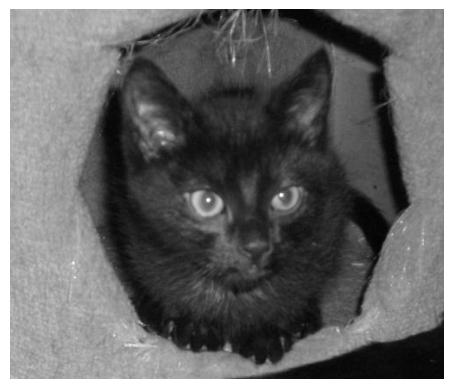

In [1]:
# Загружаем изображения из папки cat в виде черно-белых изображений
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

cat_dir = "dataset/full_dataset/PetImages/Cat"
cat_images = []

for filename in os.listdir(cat_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(cat_dir, filename)
        img = Image.open(img_path).convert("L")  # Преобразуем в черно-белое
        cat_images.append(np.array(img))

# Пример отображения одного изображения
plt.imshow(cat_images[0], cmap="gray")
plt.axis("off")
plt.show()

/root/projects/spbu_ml_2025/.venv/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


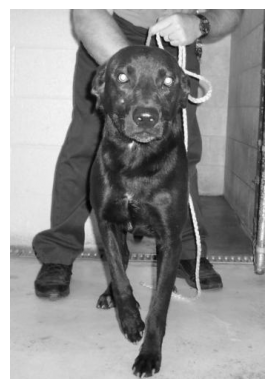

In [2]:
dog_dir = "dataset/full_dataset/PetImages/Dog"
dog_images = []

for filename in os.listdir(dog_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(dog_dir, filename)
        img = Image.open(img_path).convert("L")  # Преобразуем в черно-белое
        dog_images.append(np.array(img))

# Пример отображения одного изображения
plt.imshow(dog_images[0], cmap="gray")
plt.axis("off")
plt.show()

In [3]:
cat_images = cat_images[:500]
dog_images = dog_images[:500]

In [4]:
print(len(cat_images), len(dog_images))

500 500


In [5]:
# Приводим все изображения к одному размеру (например, 128x128)
cat_images_resized = [np.resize(img, (128, 128)) for img in cat_images]
dog_images_resized = [np.resize(img, (128, 128)) for img in dog_images]

# Добавляем к изображениям метки классов, cat - 0, dog - 1
cat_labels = [0] * len(cat_images_resized)
dog_labels = [1] * len(dog_images_resized)

images = np.array(cat_images_resized + dog_images_resized)
labels = np.array(cat_labels + dog_labels)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Преобразуем изображения в одномерные массивы
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

pipeline.fit(X_train_flat, y_train)

y_pred = pipeline.predict(X_test_flat)

print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         Cat       0.48      0.55      0.51       100
         Dog       0.47      0.40      0.43       100

    accuracy                           0.47       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.47      0.47      0.47       200

[[55 45]
 [60 40]]


In [10]:
from sklearn.decomposition import PCA


pipeline = make_pipeline(StandardScaler(), PCA(n_components=10, random_state=42), LogisticRegression(max_iter=1000, random_state=42))

pipeline.fit(X_train_flat, y_train)

y_pred = pipeline.predict(X_test_flat)

print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         Cat       0.49      0.52      0.50       100
         Dog       0.49      0.46      0.47       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

[[52 48]
 [54 46]]


/root/projects/spbu_ml_2025/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/projects/spbu_ml_2025/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

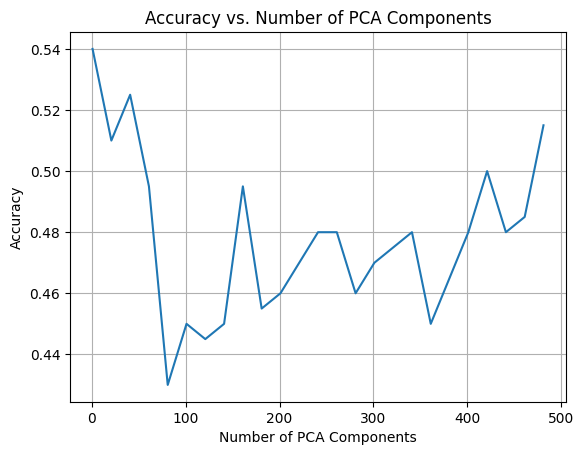

In [29]:
from sklearn.metrics import accuracy_score

components = range(1, 500, 20)
accuracies = []

for n in components:
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=n, random_state=42), LogisticRegression(max_iter=1000, random_state=42))
    pipeline.fit(X_train_flat, y_train)
    y_pred = pipeline.predict(X_test_flat)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(components, accuracies)
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of PCA Components")
plt.grid()
plt.show()

___

In [24]:
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(StandardScaler(), PCA(n_components=10, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42))
pipeline.fit(X_train_flat, y_train)
y_pred = pipeline.predict(X_test_flat)
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

              precision    recall  f1-score   support

         Cat       0.47      0.48      0.48       100
         Dog       0.47      0.46      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



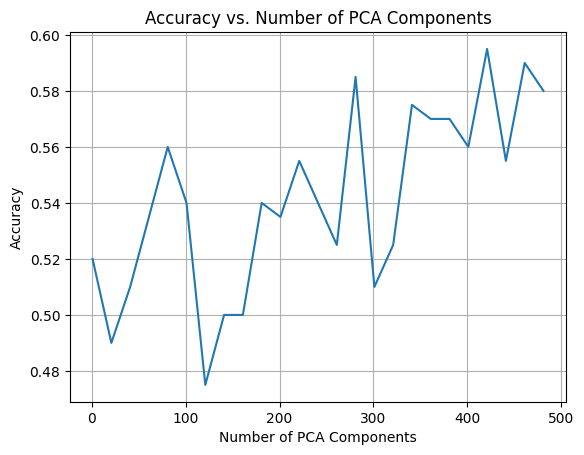

In [35]:
components = range(1, 500, 20)
accuracies = []

for n in components:
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=n, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42))
    pipeline.fit(X_train_flat, y_train)
    y_pred = pipeline.predict(X_test_flat)
    accuracies.append(accuracy_score(y_test, y_pred))
    
plt.plot(components, accuracies)
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of PCA Components")
plt.grid()
plt.show()

In [36]:
max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy)
max_index

21

In [37]:
num_components = components[max_index]
num_components

421

___

In [26]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(X_train_flat)
pca.n_components_

np.int64(146)

In [30]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(images.reshape(images.shape[0], -1))
pca.n_components_

np.int64(171)

___

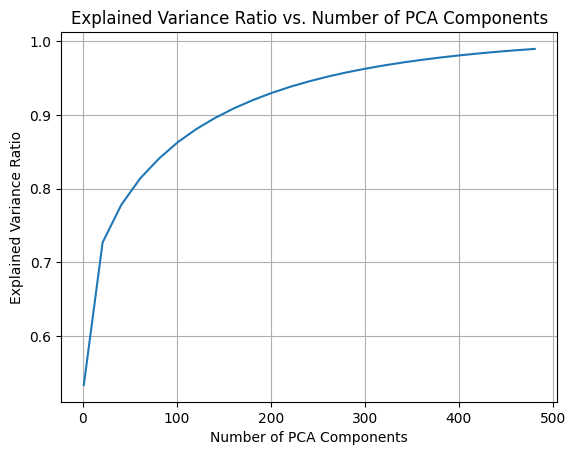

In [ ]:
variances = []
for i in range(1, 500, 20):
    pca = PCA(n_components=i, random_state=42)
    pca.fit(X_train_flat)
    variances.append(sum(pca.explained_variance_ratio_))
    
plt.plot(range(1, 500, 20), variances)
plt.xlabel("Number of PCA Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio vs. Number of PCA Components")
plt.grid()
plt.show()

___

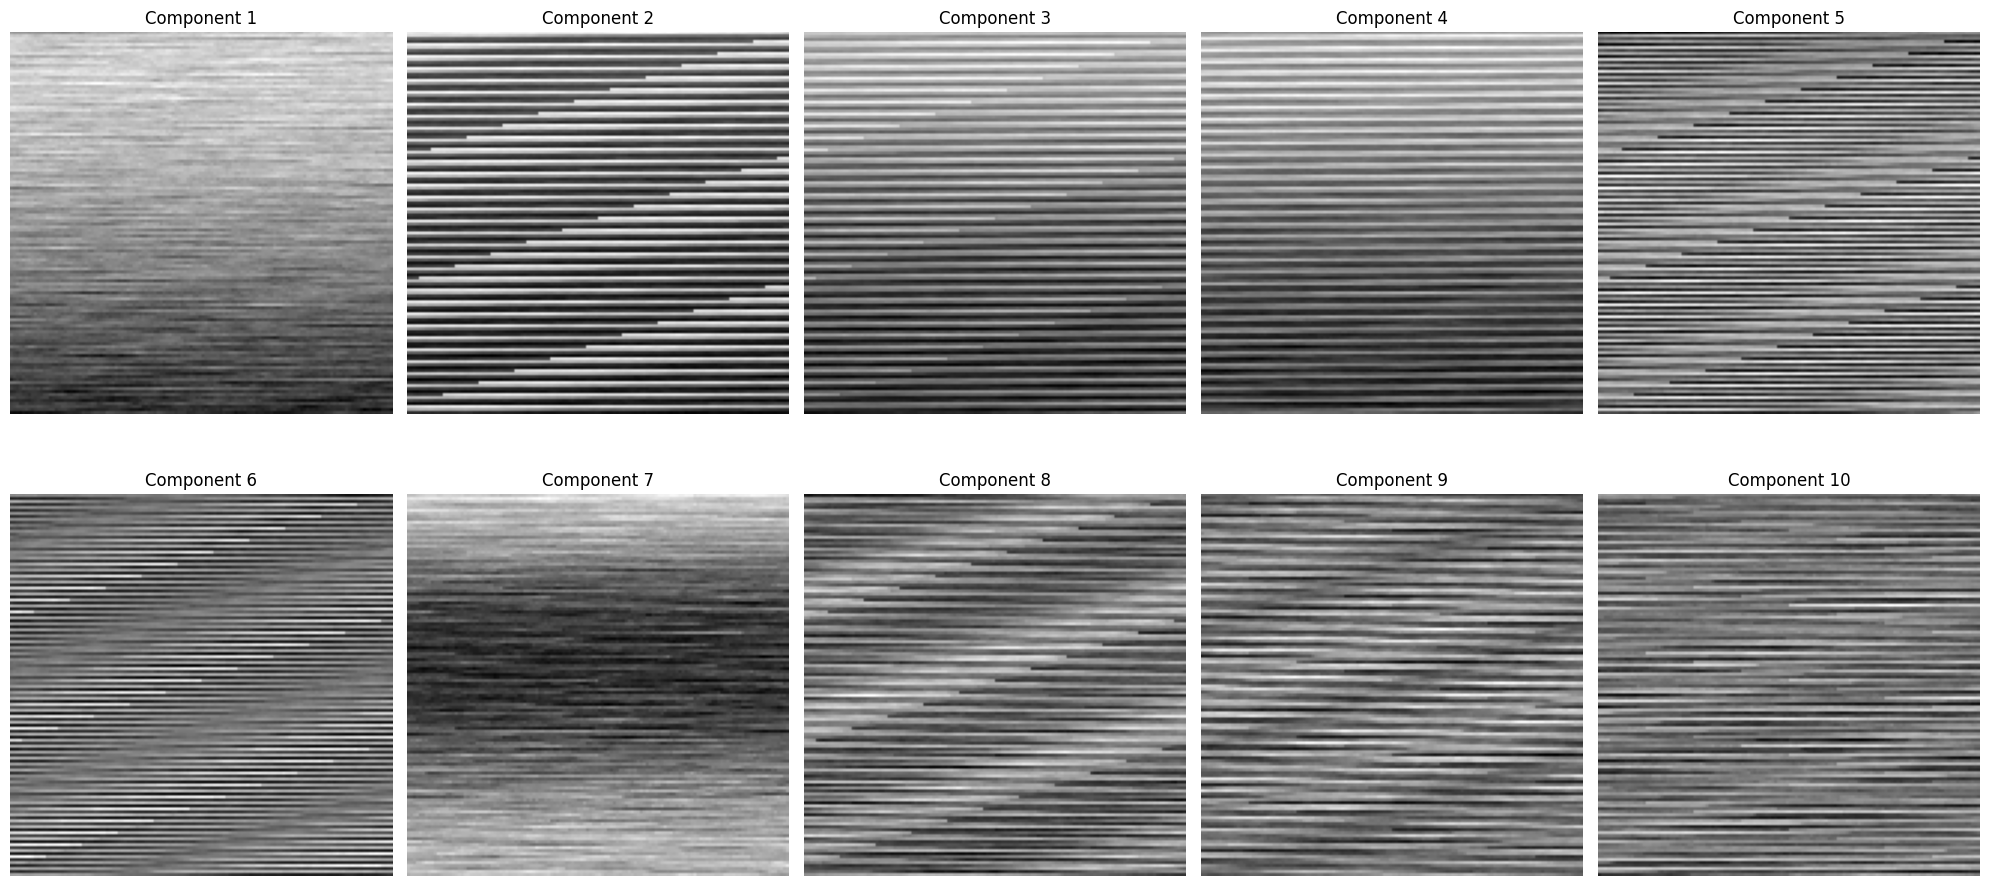

In [ ]:
pca = PCA(n_components=421, random_state=42)
pca.fit(X_train_flat)
components = pca.components_
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(components[i].reshape(128, 128), cmap="gray")
    plt.axis("off")
    plt.title(f"Component {i + 1}")
plt.tight_layout()
plt.show()

